#**PFM_04_01 Bevezetés**#

**Az előadás során alkalmazott validációs módszerek**



1.   A numerikus és az analítikus módszer összehasonlítása.
2.   A rekurziós lépéshossz (felbontás) változtatása.



$\color{Red}{Kérdések: }$



1. Milyen esetekre lehetséges a numerikus és az analítikus megoldás összehasonlítása az előző előadáson tárgyalt légköri nyomáseloszlásra és függőleges hajításra?  
2.   Mikor tekinthetjük az adott lépéshosszt (felbontást) megfelelőnek?
3. Miért nem célszerű a felbontást minden határon túl finomítani?

$\color{Green}{Megjegyzés: }$ Előfordulhatnak olyan esetek (összetett problémák esetén), amikor a felbontás finomítása nem vezet jó eredményre.   



# Légköri nyomáseloszlás modellezésének validálása

**Emlékeztető:**


1. Tengerszinti légnyomás: $p(z=0) = 101 \space kPa$
2. Tengerszinti hőmérséklet: $T(z=0)=15 ^oC =288.15 \space K$
3. A hőmérséklet magasságfüggése: $-6.5 \space \frac{^oC}{km}$ (Csak a troposzférára igaz.)
4. A rekurziós képlet:

$$p(z+\Delta z) = \frac{2 \cdot \frac{R \cdot T}{M \cdot g} -\Delta z}{2 \cdot \frac{R \cdot T}{M \cdot g} +\Delta z} \cdot p(z)$$



$\color{Blue}{Kérdés :}$ Milyen típusú változókat használunk a számolásban és miért?

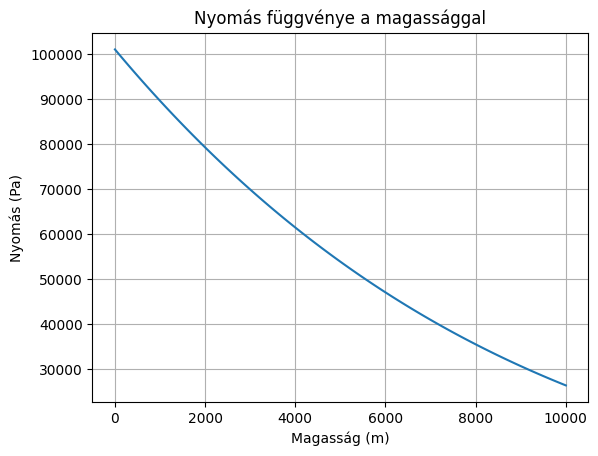

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.31447
M = 0.0289644
g = 9.80665
# Tengerszinti nyomás (Pa)
p0 = 101000

# Tengerszinti hőmérséklet (K)
T0 = 288.15

# A függőleges felbontás definiálása az első 10 km-re
z = np.linspace(0, 10000, 100)
Delta_z =z[1]-z[0]
p_z = np.zeros(len(z))

# Hőmérséklet függvénye
def T(z):
    return T0 - 6.5 * z / 1000
# A H = RT/mg függvény
def H(T):
    return R * T / (M * g)
p_z[0] = p0
for i in range(1, len(z)):
    p_z[i] = (2 * H(T(z[i])) - Delta_z) / (2 * H(T(z[i])) + Delta_z) * p_z[i - 1]
nyomáseloszlás = p_z
# Ábrázolás
plt.plot(z, nyomáseloszlás)
plt.xlabel('Magasság (m)')
plt.ylabel('Nyomás (Pa)')
plt.title('Nyomás függvénye a magassággal')
plt.grid(True)
plt.show(block=False)


$\color{Red}{Kérdések:}$


1.   Megfelel-e a tapasztalatainknak, elvárásainknak a kapott eredmény?
2.   Az eredmények alátámasztják-e az alkalmazott közelítéseket?
3. Hogyan lehetne ellenőrizni az eredmények jóságát?


$\color{Red}{Kérdés: } $ Milyen esetben tudjuk a numerikus és analítikus megoldást összehasonlítan?

$\color{Blue}{Feladat:}$ Végezzük el a rekurziós modellezést az állandó légköri hőmérséklet esetre és hasonlítsuk össze a számolt nyomásfüggést az analítikus eredménnnyel ($T = 288.15 \space K$)!

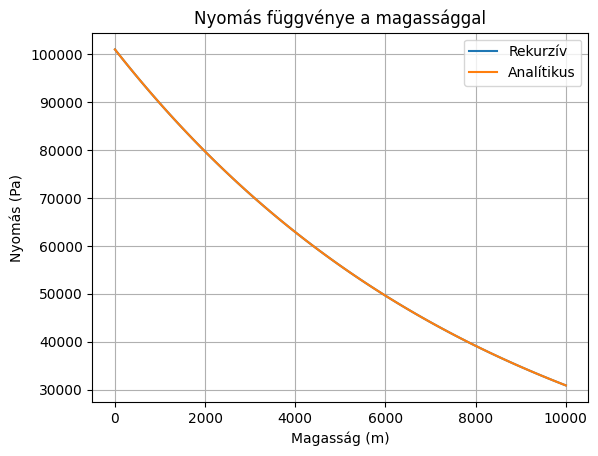

In [2]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.31447
M = 0.0289644
g = 9.80665
# Tengerszinti nyomás (Pa)
p0 = 101000

# Állandó hőmérséklet
T_állandó = 288.15

# A függőleges felbontás definiálása az első 10 km-re
z = np.linspace(0, 10000, 100)
Delta_z =z[1]-z[0]
p_z_közelített = np.zeros(len(z))

H_állandó = R * T_állandó / (M * g)
p_z_közelített[0] = p0
for i in range(1, len(z)):
    p_z_közelített[i] = (2 * H_állandó - Delta_z) / (2 * H_állandó + Delta_z) * p_z_közelített[i - 1]
nyomáseloszlás_közelített = p_z_közelített
nyomáseloszlás_analítikus = p0 * np.exp(-g * z * M/ (R * T_állandó))
# Ábrázolás
plt.plot(z, nyomáseloszlás_közelített)
plt.plot(z, nyomáseloszlás_analítikus)
plt.xlabel('Magasság (m)')
plt.ylabel('Nyomás (Pa)')
plt.title('Nyomás függvénye a magassággal')
plt.legend(['Rekurzív', 'Analítikus'])
plt.grid(True)
plt.show(block=False)

$\color{Blue}{Feladat: }$ Végezzük el a rekurziós számolást három különböző függőleges felbontás mellett és az eredményeket hasonlítsuk össze az analítikus eredménnyel!

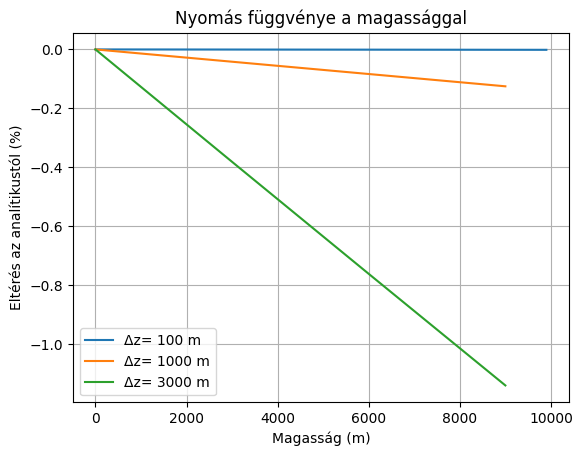

In [3]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.31447
M = 0.0289644
g = 9.80665
# Tengerszinti nyomás (Pa)
p0 = 101000

# Állandó hőmérséklet
T_állandó = 288.15

# Az analítikus függvény definiálása
def p_analítikus(z):
    return p0 * np.exp(-g * z * M / (R * T_állandó))

# A függőleges felbontás definiálása az első 10 km-re
z1 = np.arange(0, 10000, 100)
z2 = np.arange(0, 10000, 1000)
z3 = np.arange(0, 10000, 3000)
Delta_z1 =z1[1]-z1[0]
Delta_z2 =z2[1]-z2[0]
Delta_z3 =z3[1]-z3[0]
p_z_közelített_1 = np.zeros(len(z1))
p_z_közelített_2 = np.zeros(len(z2))
p_z_közelített_3 = np.zeros(len(z3))

H_állandó = R * T_állandó / (M * g)
p_z_közelített_1[0], p_z_közelített_2[0], p_z_közelített_3[0] = p0, p0, p0
for i in range(1, len(z1)):
    p_z_közelített_1[i] = (2 * H_állandó - Delta_z1) / (2 * H_állandó + Delta_z1) * p_z_közelített_1[i - 1]
    eltérés_1 = 100 * (p_z_közelített_1 - p_analítikus(z1))/p_analítikus(z1)

for i in range(1, len(z2)):
    p_z_közelített_2[i] = (2 * H_állandó - Delta_z2) / (2 * H_állandó + Delta_z2) * p_z_közelített_2[i - 1]
    eltérés_2 = 100 * (p_z_közelített_2 - p_analítikus(z2)) / p_analítikus(z2)

for i in range(1, len(z3)):
    p_z_közelített_3[i] = (2 * H_állandó - Delta_z3) / (2 * H_állandó + Delta_z3) * p_z_közelített_3[i - 1]
    eltérés_3 = 100 * (p_z_közelített_3 - p_analítikus(z3))/ p_analítikus(z3)


# Ábrázolás
plt.plot(z1, eltérés_1)
plt.plot(z2, eltérés_2)
plt.plot(z3, eltérés_3)
plt.xlabel('Magasság (m)')
plt.ylabel('Eltérés az analítikustól (%)')
plt.title('Nyomás függvénye a magassággal')
plt.legend([f'\u0394z= {Delta_z1} m', f'\u0394z= {Delta_z2} m', f'\u0394z= {Delta_z3} m'])
plt.grid(True)
plt.show(block=False)

$\color{Green}{Kiegészítés: }$ **a légköri komponensek magasságeloszlása**

$\color{Blue}{Feladat: }$ Modellezzük a különböző levegőkomponensek elméleti magasságeloszlását!

$\color{Red}{Kérdés: }$ Mi az a parciális nyomás és mi a Dalton-törvény?





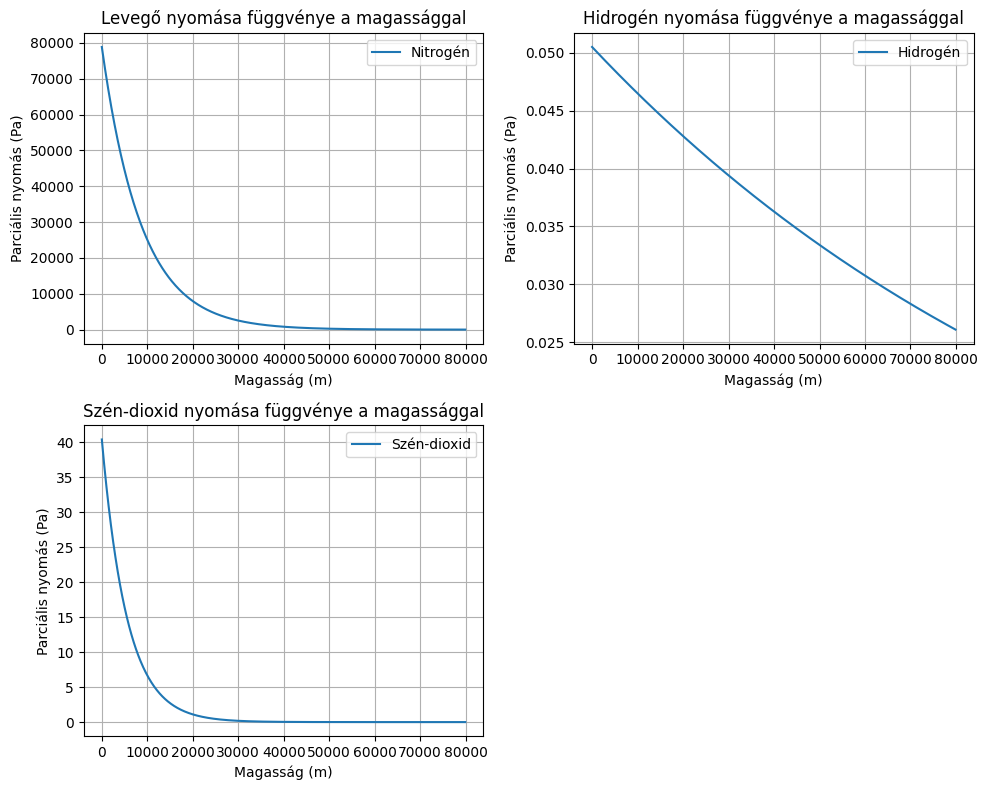

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Állandók
R = 8.31447
g = 9.80665
p0 = 101000  # Tengerszinti nyomás (Pa)
T_állandó = 288.15  # Állandó hőmérséklet

# Gázok adatai (moláris tömeg és koncentráció)
gázok = {
    "Levegő": {"M": 0.02802, "c": 0.7808},
    "Hidrogén": {"M": 0.00202, "c": 0.5 * 10**-6},
    "Szén-dioxid": {"M": 0.04401, "c": 400 * 10**-6}
}

# Magasság vektor
z = np.arange(0, 80000, 100)
Delta_z = z[1] - z[0]

# Skálamagasság számítása
def skálamagasság(M):
    return R * T_állandó / (M * g)

# Nyomás számítás magasság szerint
def nyomás_profil(H, p0_c, z, Delta_z):
    p = np.zeros(len(z))
    p[0] = p0_c
    for i in range(1, len(z)):
        p[i] = (2 * H - Delta_z) / (2 * H + Delta_z) * p[i - 1]
    return p

# Ábrázolás függvénye
def ábrázolás(z, nyomás_adatok):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Két felső ábra egymás mellett
    axs[0, 0].plot(z, nyomás_adatok['Levegő'], label='Nitrogén')
    axs[0, 0].set_xlabel('Magasság (m)')
    axs[0, 0].set_ylabel('Parciális nyomás (Pa)')
    axs[0, 0].set_title('Levegő nyomása függvénye a magassággal')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    axs[0, 1].plot(z, nyomás_adatok['Hidrogén'], label='Hidrogén')
    axs[0, 1].set_xlabel('Magasság (m)')
    axs[0, 1].set_ylabel('Parciális nyomás (Pa)')
    axs[0, 1].set_title('Hidrogén nyomása függvénye a magassággal')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Alsó középső ábra
    axs[1, 0].plot(z, nyomás_adatok['Szén-dioxid'], label='Szén-dioxid')
    axs[1, 0].set_xlabel('Magasság (m)')
    axs[1, 0].set_ylabel('Parciális nyomás (Pa)')
    axs[1, 0].set_title('Szén-dioxid nyomása függvénye a magassággal')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Üres subplot eltüntetése
    fig.delaxes(axs[1, 1])

    plt.tight_layout()
    plt.show()

# Nyomás profilok számítása és ábrázolása
nyomás_adatok = {}
for gáz, adatok in gázok.items():
    H = skálamagasság(adatok["M"])
    p = nyomás_profil(H, p0 * adatok["c"], z, Delta_z)
    nyomás_adatok[gáz] = p

ábrázolás(z, nyomás_adatok)


$\color{Red}{Kérdés: }$ Miért nem tapasztalunk komponensek szerinti rétegzettséget (miért tér el a valóságban a légköri komponensek parciális nyomása a számolttól)?

Megjegyzés: kb. 65 km felett (az ún. heteroszférában) már olyan ritkán ütköznek a molekulák, hogy kezd érvényesülni a moláris tömeg szerinti rétegzettség, és ezért a könnyű molekulák (pl. $H_2$ ) relítív koncentrációja megnő.

# ** Függőleges hajítás: az analítikus és a rekurzív modellezés eredményének összehasonlítása** #

$\color{Blue}{Feladat :}$ Vizsgáljuk meg, hogy mennyire pontosan adja vissza az analítikus megoldást a rekurzió abban az esetben, ha a gravitációs gyorsulás magasságfüggésétől eltekinthetünk?

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitációs gyorsulás (m/s^2)
g = 9.81

# Kezdősebesség (m/s)
v0 = 100.0/3.6

# Időintervallum (másodperc)

# A szimuláció időtartalma és az időfelbontás definiálása (másodperc)
# t_values = np.linspace(0, 10, 100)
# A folyamat teljes ideje:
teljes_idő = 2 * v0/g
t_values = np.linspace(0,teljes_idő, 100)
delta_t = t_values[1] - t_values[0]

In [6]:
# Analitikus sebességfüggvény
def sebesség(t):
  return v0 - g * t

# Analitikus magasságfüggvény
def magasság(t):
  return v0 * t - 0.5 * g * t**2


# Analitikus mennyiségek kiszámítása
analítikus_sebesség = sebesség(t_values)
analítikus_magasság = magasság(t_values)

$\color{Blue}{Számolás:}$ Numerikus módszer

In [7]:
# Numerikus mennyiségek
numerikus_sebesség, numerikus_magasság  = np.zeros((2, len(t_values)))
numerikus_sebesség[0] = v0
for i in range(1, len(t_values)):
  numerikus_sebesség[i] = numerikus_sebesség[i-1] - g * delta_t
  numerikus_magasság[i] = numerikus_magasság[i-1] + numerikus_sebesség[i-1] * delta_t - 0.5 * g * delta_t**2

$\color{Blue}{Számolás: }$ Az analitikus és a numerikus eredmény összehasonlítása

In [8]:
sebesség_különbség = analítikus_sebesség - numerikus_sebesség
magasság_különbség = analítikus_magasság - numerikus_magasság

$\color{Blue}{Ábrázolás:}$ Az analítikus és a numerikus eredmények közötti különbségek ábrázolása

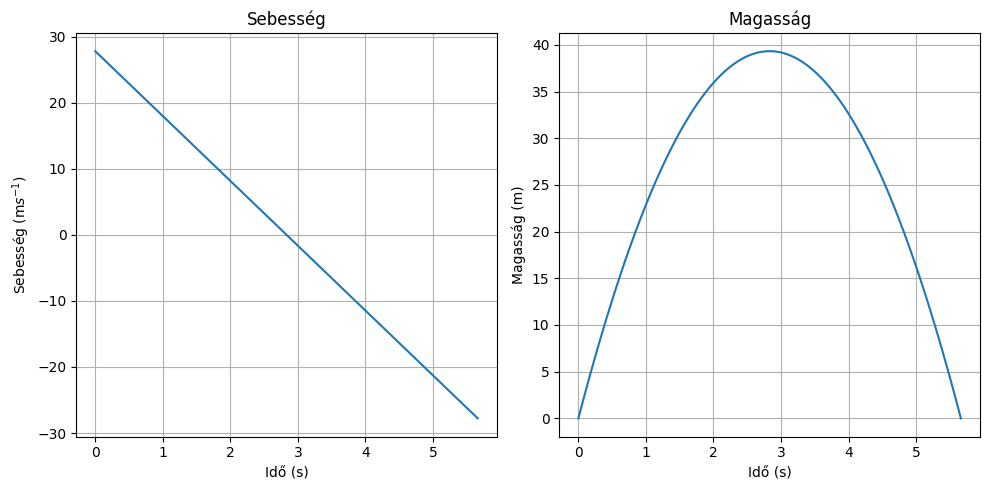

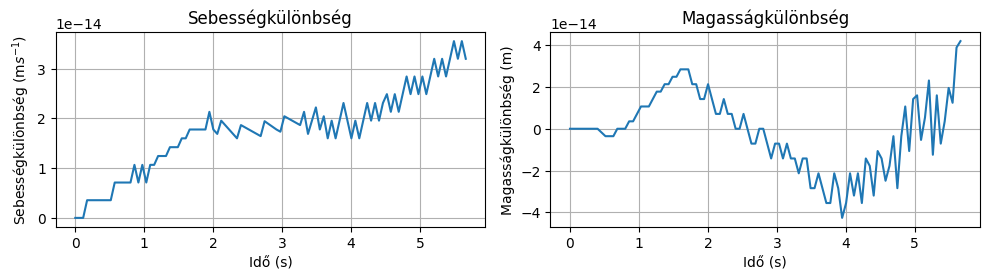

In [9]:
plt.figure(figsize=(10, 5))

# Sebességkülönbség ábrázolása
plt.subplot(1, 2, 1)
plt.plot(t_values, analítikus_sebesség)
plt.xlabel('Idő (s)')
plt.ylabel('Sebesség (m$s^{-1}$)')
plt.title('Sebesség')
plt.grid(True)

# Magasságkülönbség ábrázolása
plt.subplot(1, 2, 2)
plt.plot(t_values, analítikus_magasság)
plt.xlabel('Idő (s)')
plt.ylabel('Magasság (m)')
plt.title('Magasság')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

# Sebességkülönbség ábrázolása
plt.subplot(2, 2, 1)
plt.plot(t_values, sebesség_különbség)
plt.xlabel('Idő (s)')
plt.ylabel('Sebességkülönbség (m$s^{-1}$)')
plt.title('Sebességkülönbség')
plt.grid(True)

# Magasságkülönbség ábrázolása
plt.subplot(2, 2, 2)
plt.plot(t_values, magasság_különbség)
plt.xlabel('Idő (s)')
plt.ylabel('Magasságkülönbség (m)')
plt.title('Magasságkülönbség')
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def energiamérleg(t, v0, tömeg):
  # Gravitációs gyorsulás (m/s^2)
  g = 9.81

  # Aktuális sebesség
  v = v0 - g * t

  # Aktuális elmozdulás a földfelszínhez képest
  s = v0 * t - 0.5 * g * t**2

  # Kinetikus energia
  E_kin = 0.5 * tömeg * v**2

  # Pillanatnyi teljesítmény
  P = -tömeg * g * v

  # Összmunka
  W = -tömeg * g * s

  # Munkatétel
  Munkatétel = E_kin - 0.5 * tömeg * v0**2 - W

  return E_kin, P, W, Munkatétel

v0 = 100.0/3.6
tömeg = 1.0
t_max = 2 * v0 / g
időpontok = np.linspace(0, t_max, 100)
kinetikus_energia, teljesítmény, összmunka, Munkatétel = energiamérleg(időpontok, v0, tömeg)

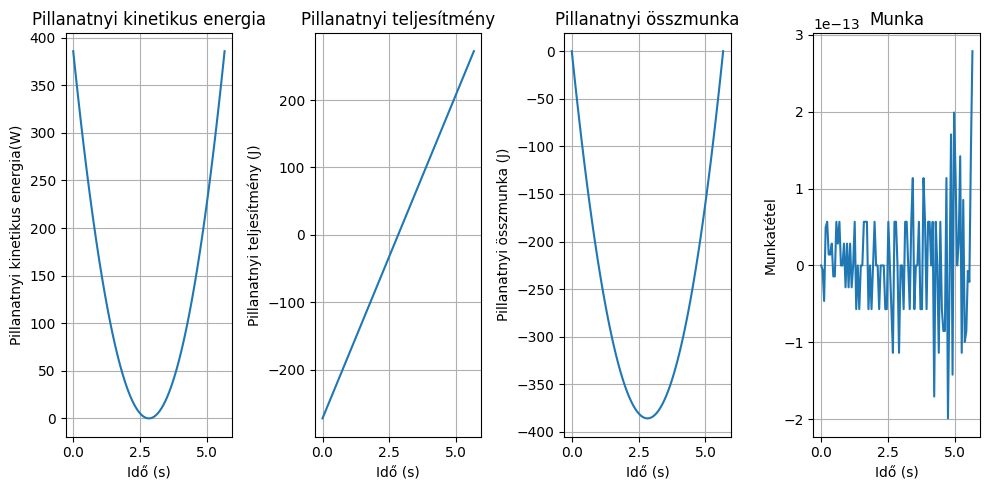

In [11]:
plt.figure(figsize=(10, 5))

# Pillanatnyi kinetikus energia ábrázolása
plt.subplot(1, 4, 1)
plt.plot(időpontok, kinetikus_energia)
plt.xlabel('Idő (s)')
plt.ylabel('Pillanatnyi kinetikus energia(W)')
plt.title('Pillanatnyi kinetikus energia')
plt.grid(True)

# Pillanatnyi teljesítmény ábrázolása
plt.subplot(1, 4, 2)
plt.plot(időpontok, teljesítmény)
plt.xlabel('Idő (s)')
plt.ylabel('Pillanatnyi teljesítmény (J)')
plt.title('Pillanatnyi teljesítmény')
plt.grid(True)

# Pillanatnyi összmunka
plt.subplot(1, 4, 3)
plt.plot(időpontok, összmunka)
plt.xlabel('Idő (s)')
plt.ylabel('Pillanatnyi összmunka (J)')
plt.title('Pillanatnyi összmunka')
plt.grid(True)

# Munkatétel ábrázolása
plt.subplot(1, 4, 4)
plt.plot(időpontok, Munkatétel)
plt.xlabel('Idő (s)')
plt.ylabel('Munkatétel')
plt.title('Munka')
plt.grid(True)


plt.tight_layout()
plt.show()

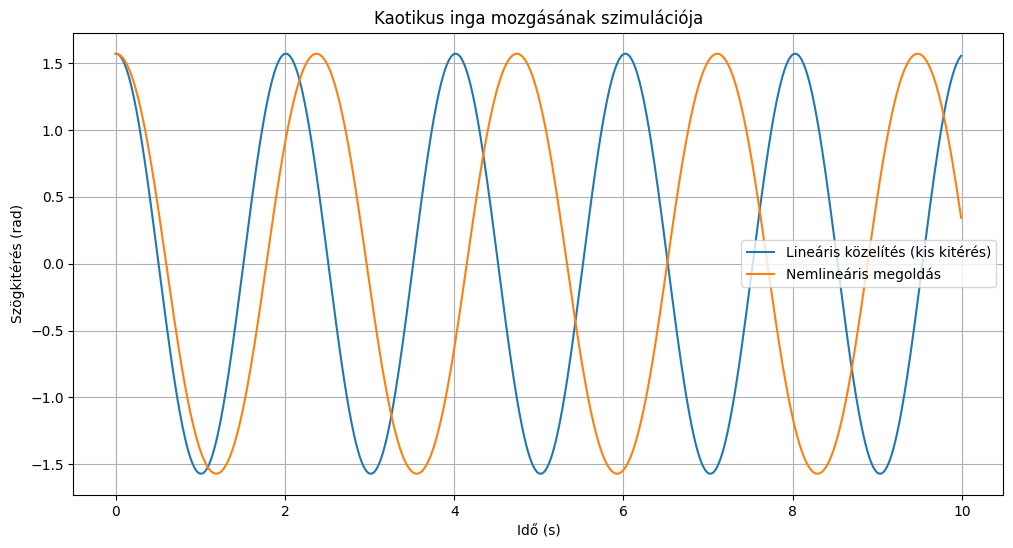

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Inga paraméterei
g = 9.81  # gravitációs gyorsulás (m/s^2)
L = 1.0   # inga hosszúsága (m)
dt = 0.01 # időlépés (s)
t_max = 10 # szimulációs idő (s)

# Kezdeti feltételek
theta_0 = np.pi / 2  # kezdeti szögkitérés (rad)
omega_0 = 0.0        # kezdeti szögsebesség (rad/s)

# Időintervallum generálása
t = np.arange(0, t_max, dt)

# Változók inicializálása
theta_linear = np.zeros_like(t)
theta_nonlinear = np.zeros_like(t)

# Kezdeti értékek beállítása
theta_linear[0] = theta_0
theta_linear[1] = theta_0 + omega_0 * dt
theta_nonlinear[0] = theta_0
theta_nonlinear[1] = theta_0 + omega_0 * dt

# Rekurzív megoldás: lineáris közelítés (kis kitérés)
for i in range(1, len(t) - 1):
    theta_linear[i + 1] = 2 * theta_linear[i] - theta_linear[i - 1] - (g / L) * theta_linear[i] * dt**2

# Rekurzív megoldás: nemlineáris pontos megoldás
for i in range(1, len(t) - 1):
    theta_nonlinear[i + 1] = 2 * theta_nonlinear[i] - theta_nonlinear[i - 1] - (g / L) * np.sin(theta_nonlinear[i]) * dt**2

# Eredmények ábrázolása
plt.figure(figsize=(12, 6))
plt.plot(t, theta_linear, label='Lineáris közelítés (kis kitérés)')
plt.plot(t, theta_nonlinear, label='Nemlineáris megoldás')
plt.title('Kaotikus inga mozgásának szimulációja')
plt.xlabel('Idő (s)')
plt.ylabel('Szögkitérés (rad)')
plt.legend()
plt.grid(True)
plt.show()


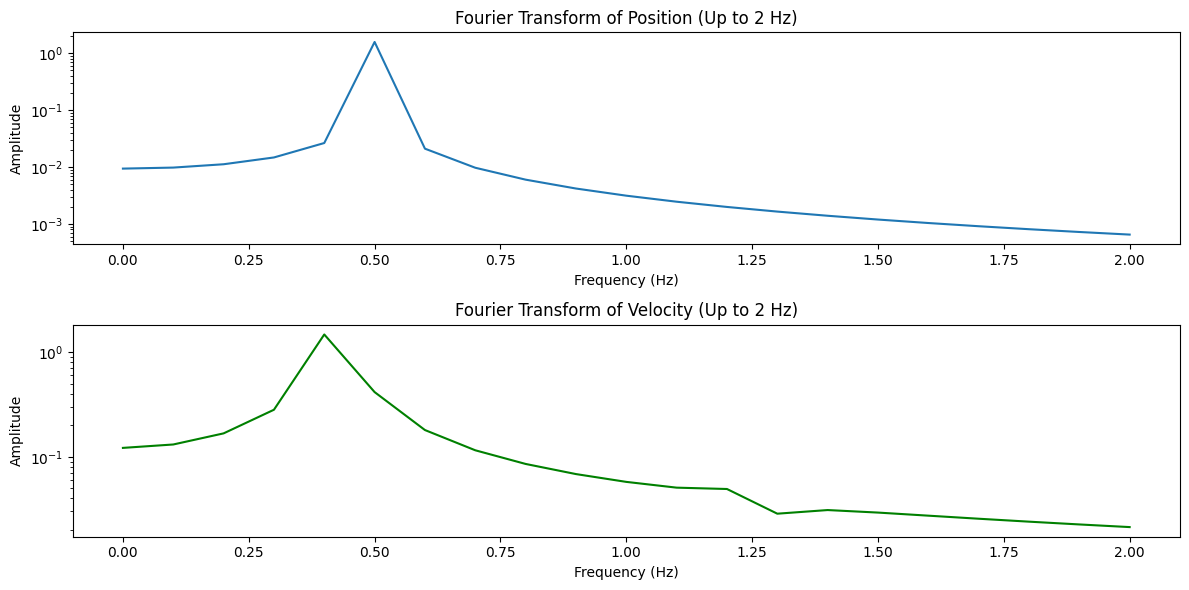

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Korábbi szimuláció alapján nyert adatok (pozíció és sebesség)
positions = np.array(theta_linear)
velocities = np.array(theta_nonlinear)

# Fourier-transzformáció
position_fft = fft(positions)
velocity_fft = fft(velocities)

# Frekvenciák kiszámítása
N = len(t)
T = dt  # Időlépés
freqs = fftfreq(N, T)[:N//2]  # Pozitív frekvenciák

# Amplitúdó spektrumok
position_amplitude = 2.0/N * np.abs(position_fft[:N//2])
velocity_amplitude = 2.0/N * np.abs(velocity_fft[:N//2])

# Csak a 2 Hz alatti frekvenciák kiválasztása
freq_limit = 2.0  # Hz
mask = freqs <= freq_limit


# Fourier-transzformáció eredményeinek megjelenítése
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freqs[mask], position_amplitude[mask])
plt.title('Fourier Transform of Position (Up to 2 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.yscale("log")

plt.subplot(2, 1, 2)
plt.plot(freqs[mask], velocity_amplitude[mask], color='g')
plt.title('Fourier Transform of Velocity (Up to 2 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.yscale("log")

plt.tight_layout()
plt.show()


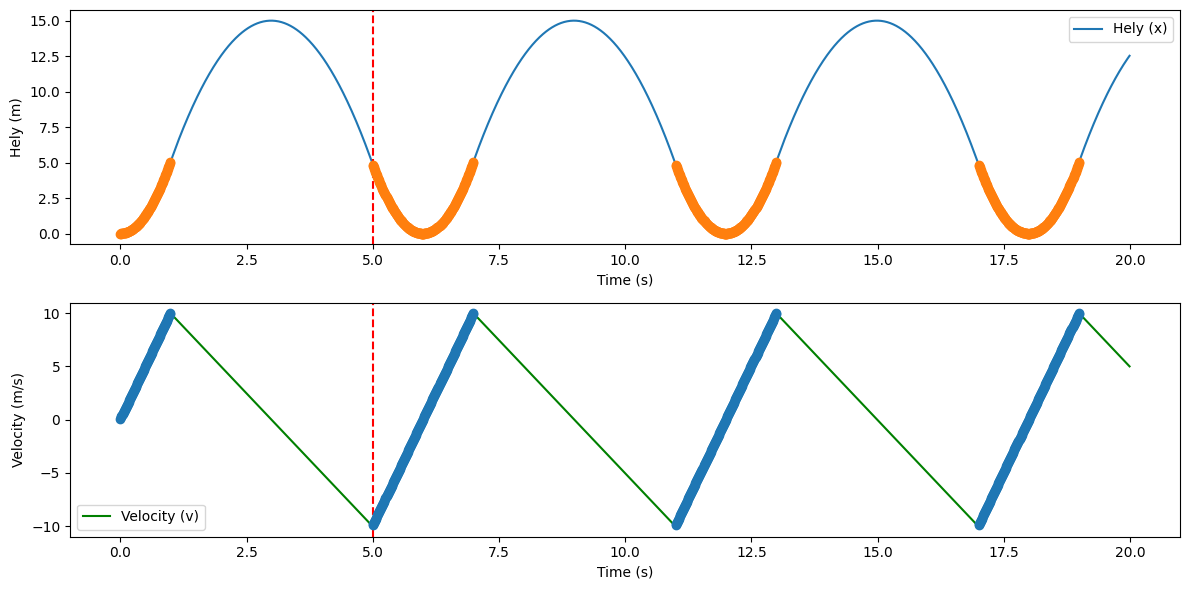

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Paraméterek
q = 1.0  # Töltés (Coulomb)
m = 1.0  # Töltés tömege (kg)
x0 = 5.0  # Határvonal (m)
E1 = 10.0  # Elektromos tér az első tartományban (V/m)
E2 = -5.0  # Elektromos tér a második tartományban (V/m)
t_max = 20.0  # Idő tartomány (s)
dt = 0.01  # Időlépés (s)

# Kezdeti feltételek
x = 0.0  # Kezdeti pozíció (m)
v = 0.0  # Kezdeti sebesség (m/s)

# Idő lépések
time = np.arange(0, t_max, dt)
positions = []
velocities = []

time2=[]
positions2 = []
velocities2 = []

# Mozgás szimulációja
for t in time:
    if x <= x0:
        E = E1
    else:
        E = E2

    # Newton második törvénye: F = m*a, ahol F = q*E
    a = (q * E) / m  # Gyorsulás (m/s^2)

    # Sebesség és pozíció frissítése
    v += a * dt
    x += v * dt

    # Adatok tárolása
    positions.append(x)
    velocities.append(v)
    
    if(E==E1):
        time2.append(t)
        positions2.append(x)
        velocities2.append(v)
        
    
    

# Eredmények megjelenítése
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, positions, label='Hely (x)')
plt.axvline(x=x0, color='r', linestyle='--', label='')
plt.xlabel('Time (s)')
plt.ylabel('Hely (m)')
plt.legend()
plt.plot(time2,positions2,"o")

plt.subplot(2, 1, 2)
plt.plot(time, velocities, label='Velocity (v)', color='g')
plt.axvline(x=x0, color='r', linestyle='--', label='')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.plot(time2,velocities2,"o")


plt.tight_layout()
plt.show()


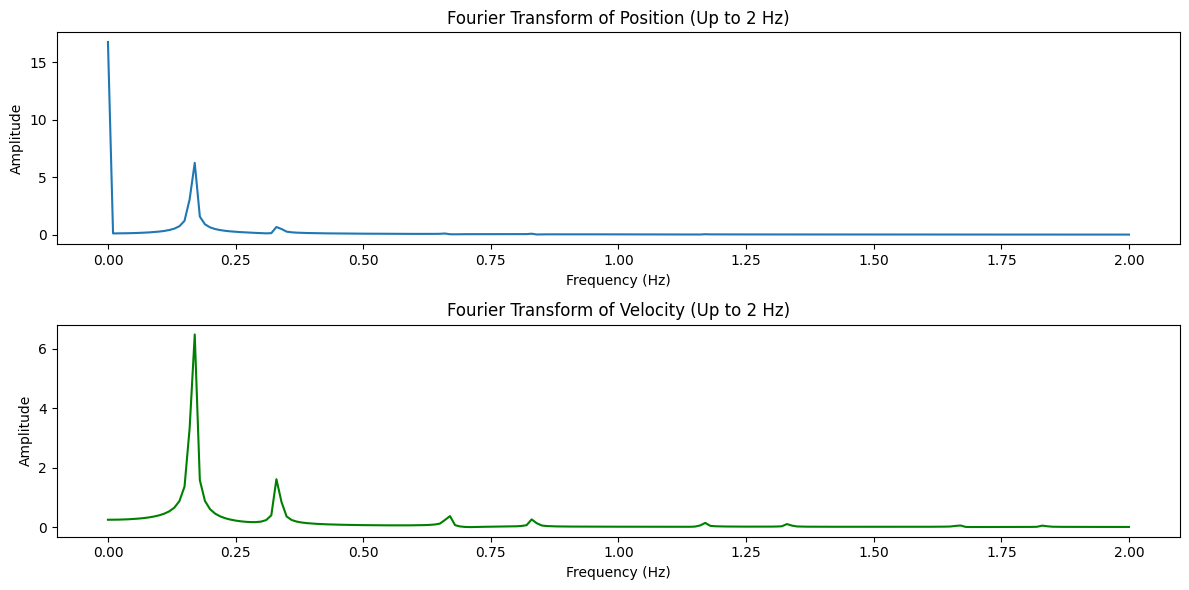

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Korábbi szimuláció alapján nyert adatok (pozíció és sebesség)
positions = np.array(positions)
velocities = np.array(velocities)

# Fourier-transzformáció
position_fft = fft(positions)
velocity_fft = fft(velocities)

# Frekvenciák kiszámítása
N = len(time)
T = dt  # Időlépés
freqs = fftfreq(N, T)[:N//2]  # Pozitív frekvenciák

# Amplitúdó spektrumok
position_amplitude = 2.0/N * np.abs(position_fft[:N//2])
velocity_amplitude = 2.0/N * np.abs(velocity_fft[:N//2])

# Csak a 2 Hz alatti frekvenciák kiválasztása
freq_limit = 2.0  # Hz
mask = freqs <= freq_limit


# Fourier-transzformáció eredményeinek megjelenítése
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freqs[mask], position_amplitude[mask])
plt.title('Fourier Transform of Position (Up to 2 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs[mask], velocity_amplitude[mask], color='g')
plt.title('Fourier Transform of Velocity (Up to 2 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/szarazd/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['fft', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(0.0, 3.0)

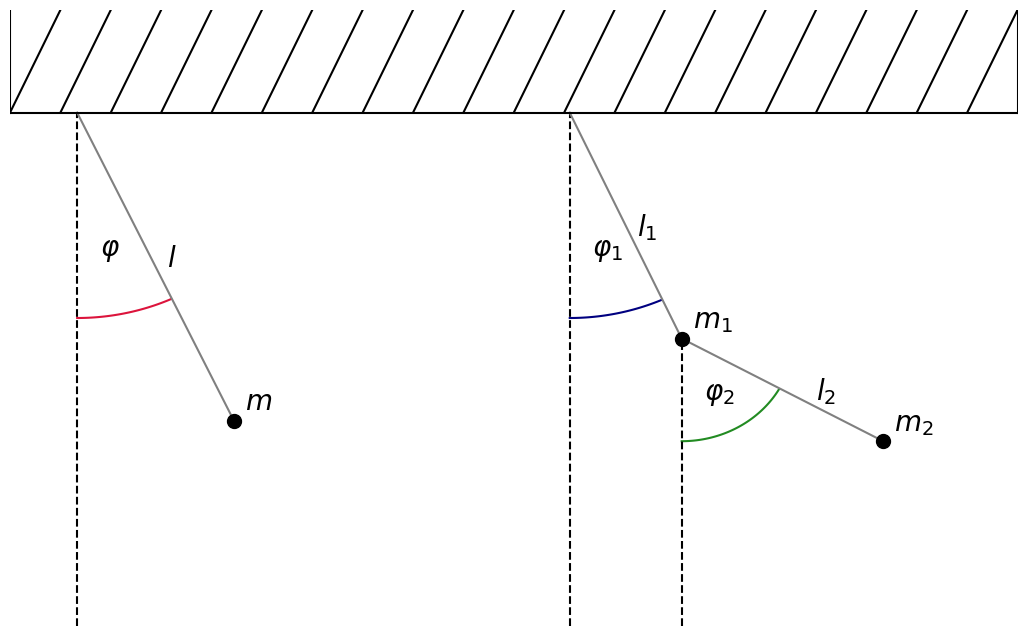

In [31]:
#necessary imports
%pylab inline
from scipy.interpolate import *
from scipy.interpolate import sproot
from scipy.integrate import odeint
from scipy.optimize import fsolve

def circ(x,x0,y0,R):
    return -(sqrt(R**2-(x-x0)**2))+y0

x1=np.linspace(0.3,0.72,100)
x2=np.linspace(2.5,2.91,100)
x3=np.linspace(3,3.435,100)

#plt.figure(figsize=(15,8),frameon=False,edgecolor="green")

fig, ax = plt.subplots(figsize=(13,8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.plot(x1,circ(x1,0.3,2.5,1.),color="crimson")
plt.plot(x2,circ(x2,2.5,2.5,1.),color="navy")
plt.plot(x3,circ(x3,3.,1.4,0.5),color="forestgreen")

plt.plot([0.3,0.3],[0,2.5],"--",color="black")
plt.plot([1,0.3],[1,2.5],color="gray")
plt.plot([1],[1],"o",markersize=10,color="black")
plt.text(0.4,1.8,"$\\varphi$",fontsize="20")
plt.text(1.05,1.05,"$m$",fontsize="20")
plt.text(0.7,1.75,"$l$",fontsize="20")


plt.plot([2.5,2.5],[0,2.5],"--",color="black")
plt.plot([2.5,3],[2.5,1.4],color="gray")
plt.text(2.6,1.8,"$\\varphi_1$",fontsize="20")
plt.text(3.05,1.45,"$m_1$",fontsize="20")
plt.text(2.8,1.9,"$l_1$",fontsize="20")

plt.plot([3,3.9],[1.4,0.9],color="gray")
plt.plot([3,3],[0,1.4],"--",color="black")

plt.plot([3.9],[0.9],"o",markersize=10,color="black")
plt.plot([3],[1.4],"o",markersize=10,color="black")
plt.text(3.1,1.1,"$\\varphi_2$",fontsize="20")
plt.text(3.6,1.1,"$l_2$",fontsize="20")
plt.text(3.95,0.95,"$m_2$",fontsize="20")



plt.plot([0,4.5],[2.5,2.5],color="black")
for i in range(20):
    plt.plot([4.5/20*i,4.5/20*(i+1)],[2.5,3],color="black")
plt.plot([0,0],[2.5,3],color="black")
plt.plot([4.5,4.5],[2.5,3],color="black")


plt.xticks([])
plt.yticks([])
plt.xlim(0,4.5)
plt.ylim(0,3)

#plt.savefig("pendulum.png")

In [32]:
g=1 #gravity

#simple pendulum
def simp_pend(u,t,sp_params):  #initial parameters, time, constants
    l=sp_params[0]
    #assign each parameter its value
    phi,omega=u[0],u[1]
    #assign each coordinate its value
    beta=-g/l*sin(phi)
    #the equation of motion
    return [omega,beta] #increment function

#damped-driven pendulum
def dd_pend(u,t,p_params,extf,extf_params,dampf): #initial parameters, time, constants, external force, its parameters, damping force, damping strength
    m,l,gamma=p_params[0],p_params[1],p_params[2]
    #assign each parameter its value
    phi,omega=u[0],u[1]
    #assign each coordinate its value
    beta=-g/l*sin(phi)-dampf(omega,gamma,m)+extf(t,*extf_params)/(m*l)
    #the equation of motion
    return [omega,beta] #increment function

#double pendulum
def double_pend(u,t,dp_params):  #initial parameters, time, constants
    m1,m2,l1,l2=dp_params[0],dp_params[1],dp_params[2],dp_params[3]
    #assign each parameter its value
    phi1,phi2,omega1,omega2=u[0],u[1],u[2],u[3]
    #assign each coordinate its value
    beta1=(-g*(2*m1+m2)*sin(phi1)-m2*g*sin(phi1-2*phi2)-2*sin(phi1-phi2)*m2*(omega2**2*l2+omega1**2*l1*cos(phi1-phi2)))/(l1*(2*m1+m2-m2*cos(2*phi1-2*phi2)))
    beta2=(2*sin(phi1-phi2)*(omega1**2*l1*(m1+m2)+g*(m1+m2)*cos(phi1)+omega2**2*l2*m2*cos(phi1-phi2)))/(l2*(2*m1+m2-m2*cos(2*phi1-2*phi2)))
    #the equations of motion
    return [omega1,omega2,beta1,beta2] #increment function

#sin external force
def sin_force(t,A,omega_e,delta): #time, amplitude, frequency, phase
    return A*sin(omega_e*t+delta)

def impulse_force(t,A,f):  
    return A*int(abs((f*t)-floor(f*t))<=dt and t!=dt)

#impulse external force
def impulse_force(t,A,f): #time, amplitude, frequency
    if(abs(f*t-np.round(f*t))<=1e-3): #numeric width of signal
        return A
    else:
        return 0

#exponentially decaying external force
def exp_force(t,A,beta): #time, amplitude, decay constant
    return A*e**(-beta*t)

#polinomial external force
def pol_force(t,A,n): #time,amplitude,power
    return A*t**n

#Coulomb damping
def coul_damp(omega,gamma,m):
    return omega/abs(omega)*gamma/m

#linear damping
def lin_damp(omega,gamma,m):
    return gamma/m*omega

#quadratic damping
def quad_damp(omega,gamma,m):
    return gamma/m*omega*abs(omega)

#Poincare section and phase diagram plotting function
def poincare(t,datax,datay,dataz=None): #time interval, data
    inter_datax=interp1d(t,datax,'cubic')  
    inter_datay=interp1d(t,datay,'cubic')
    #data is interpolated
    if(type(dataz)==numpy.ndarray): #if dataz is given, it is a double pendulum
        inter_dataz=interp1d(t,dataz,'cubic') #interpolate dataz
        d1=[]
        d2=[]
        #empty list for roots of different direction
        for i in range(len(dataz)-1):
            if(dataz[i]>0 and dataz[i+1]<0): #crossing from 1 side
                d1.append(fsolve(inter_dataz,(t[i]+t[i+1])/2)[0]) #find its approximate time via interpolation
            elif(dataz[i]<0 and dataz[i+1]>0): #crossing from the other side
                d2.append(fsolve(inter_dataz,(t[i]+t[i+1])/2)[0]) #find its approximate time via interpolation
        
        plt.figure(figsize=(8,8))
        plt.plot(inter_datax(d1),inter_datay(d1),"o",color="navy",markersize=3)
        plt.plot(inter_datax(d2),inter_datay(d2),"o",color="black",markersize=3)
        plt.xlabel("$\\varphi_2$",size=25)
        plt.ylabel("$\\omega_2$",size=25)
        plt.xticks(size=20)
        plt.yticks(size=20)
        #plotting the Poincaré section
    else:#if data x is not given, then no variables are fixed
        plt.figure(figsize=(8,8))
        plt.plot(datax,datay,"o",color="forestgreen",markersize=3)
        plt.xlabel("$\\varphi$",size=25)
        plt.ylabel("$\\omega$",size=25)
        plt.xticks(size=20)
        plt.yticks(size=20)
        #plotting omega(phi) 
        
def poincare(lab,t,datax,datay,dataz=None): #time interval, data
    if(max(abs(datax))>np.pi):
        for i in range(len(datax)):
            while(datax[i]<-np.pi):
                datax[i]+=2*np.pi
            while(datax[i]>=np.pi):
                datax[i]+=-2*np.pi
    if(type(dataz)==numpy.ndarray): #if dataz is given, it is a double pendulum
        if(max(abs(dataz))>np.pi):
            for i in range(len(dataz)): #count for periodicity of angle parameters
                while(dataz[i]<-np.pi):
                    dataz[i]+=2*np.pi
                while(dataz[i]>=np.pi):
                    dataz[i]+=-2*np.pi
        d1=[]
        d2=[]
        #empty list for root indexes of different direction
        for i in range(len(dataz)-1):
            if(dataz[i]>0 and dataz[i+1]<0): #crossing from 1 side
                d1.append(i) #find its approximate time via interpolation
            elif(dataz[i]<0 and dataz[i+1]>0): #crossing from the other side
                d2.append(i) #find its approximate time via interpolation
        d1=array(d1)
        d2=array(d2)
        plt.figure(figsize=(8,8))
        plt.plot((datax[d1]+datax[d1+1])/2,(datay[d1]+datay[d1+1])/2,"o",color="navy",markersize=3)
        plt.plot((datax[d2]+datax[d2+1])/2,(datay[d2]+datay[d2+1])/2,"o",color="black",markersize=3)
        plt.xlabel("$\\varphi_2$",size=25)
        plt.ylabel("$\\omega_2$",size=25)
        plt.xticks(size=20)
        plt.yticks(size=20)
        plt.xticks([-np.pi,0,np.pi],["$-\\pi$","$0$","$\\pi$"],fontsize=20)
        plt.title(lab,fontsize=30)

        #plotting the Poincaré section
    else:#if data x is not given, then no variables are fixed
        plt.figure(figsize=(8,8))
        plt.plot(datax,datay,"o",color="forestgreen",markersize=2)
        plt.title(lab,fontsize=30)
        plt.xlabel("$\\varphi$",size=25)
        plt.ylabel("$\\omega$",size=25)
        plt.xticks(size=20)
        plt.xticks([-np.pi,0,np.pi],["$-\\pi$","$0$","$\\pi$"],fontsize=20)
        plt.yticks(size=20)
        #plotting omega(phi) 

#time sampling function
def time_samp(T):
    res=1000 #number of points in a second
    N=int(res*T) #total number of points
    dt=T/(int(res*T)-1) #time difference of points
    t=linspace(0,T,N) #time series
    return T,N,dt,t

def bif(t,datax,datay,err):
    if(max(abs(datay))>np.pi):
        for i in range(len(datay)):
            while(datay[i]<-np.pi):
                datay[i]+=2*np.pi
            while(datay[i]>=np.pi):
                datay[i]+=-2*np.pi
    values=datax[np.where(abs(datay) < err)[0]]
    #for i in range(len(datay)):
    #    if(abs(datay[i])<=1e-5):
    #        values.append(datax[i])
    return values
        
def spbif_eva(u0,Np,runtime,vali,valf,sp_params,xlabel,ylabel):
    T,N,dt,t=time_samp(runtime)
    plt.figure(figsize=(15,8))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
    plt.xlim(vali,valf)
    for i in range(Np):
        val=vali+i*(valf-vali)/(Np-1)
        dp_params[0]=val
        u1=odeint(simp_pend,u0,t,args=(sp_params,))
        values=bif(t,u1[:,1],u1[:,0],1e-5)
        plt.plot([val for i in range(len(values))],abs(values),"o",markersize=0.8,color="navy")


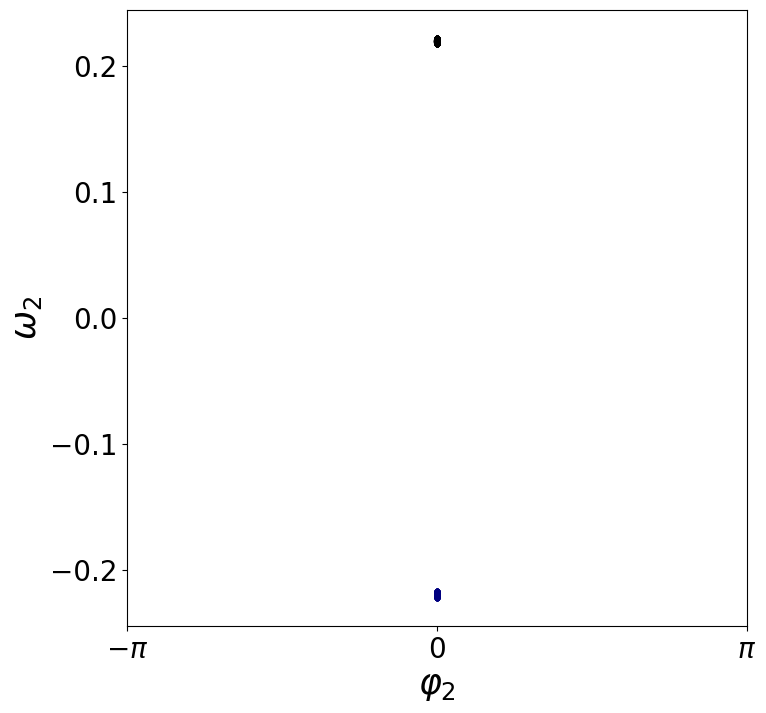

In [33]:
dp_params=[1,1,1,1] #parameters of the double pendulum: m1,m2,l1,l2
T,N,dt,t=time_samp(1000)

u0= [0.2,0.2828,0,0] #inital parameters
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])

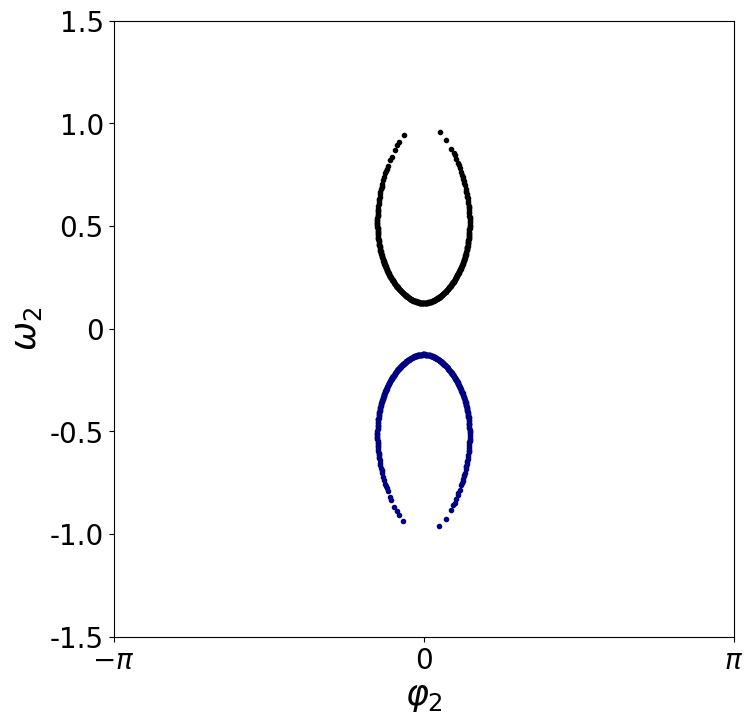

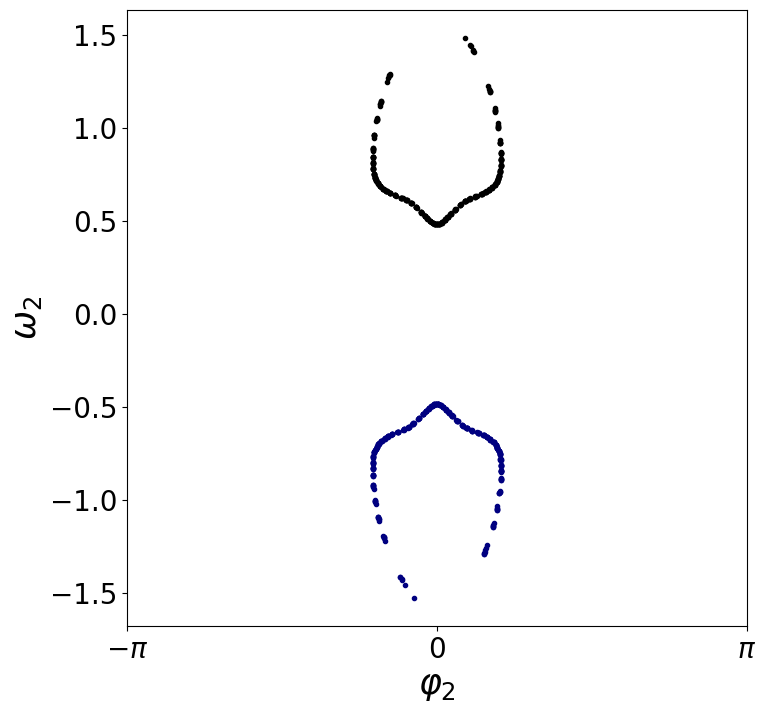

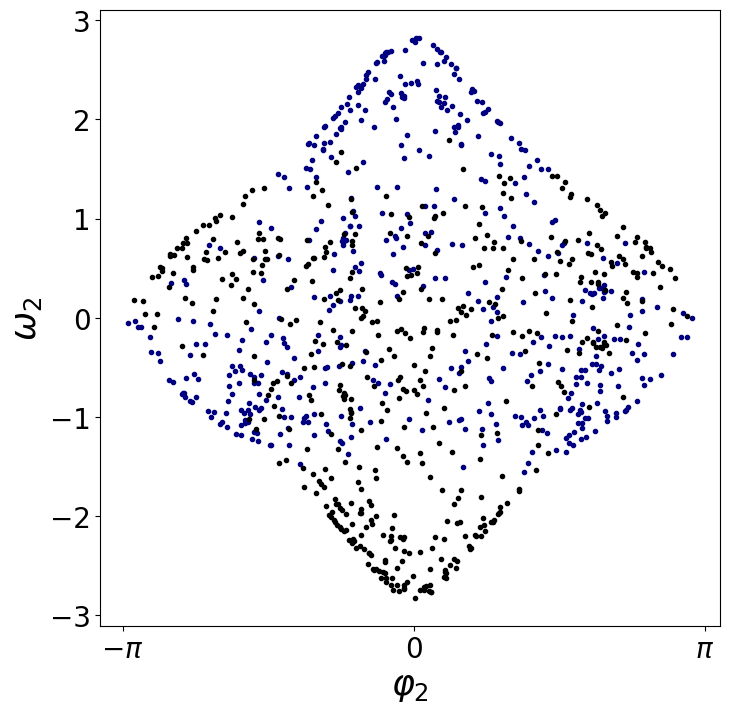

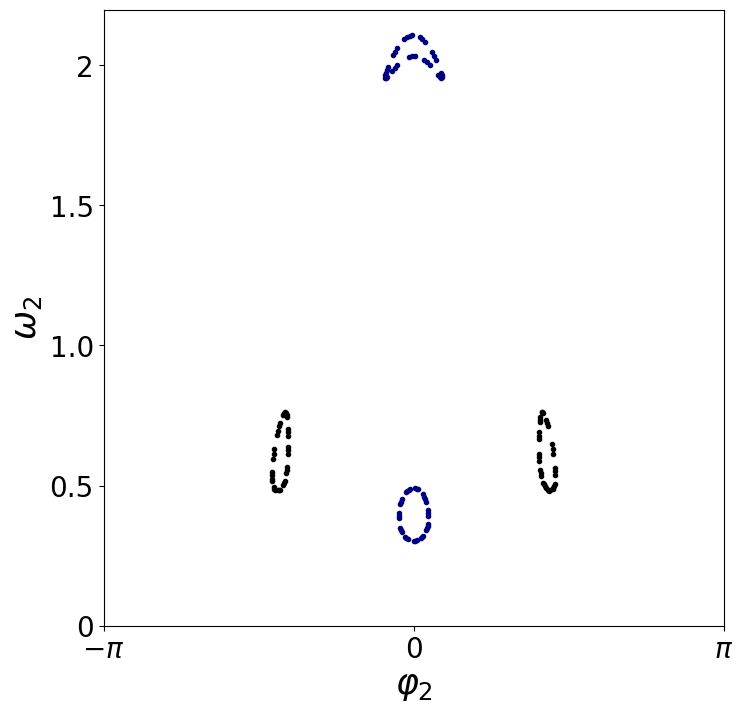

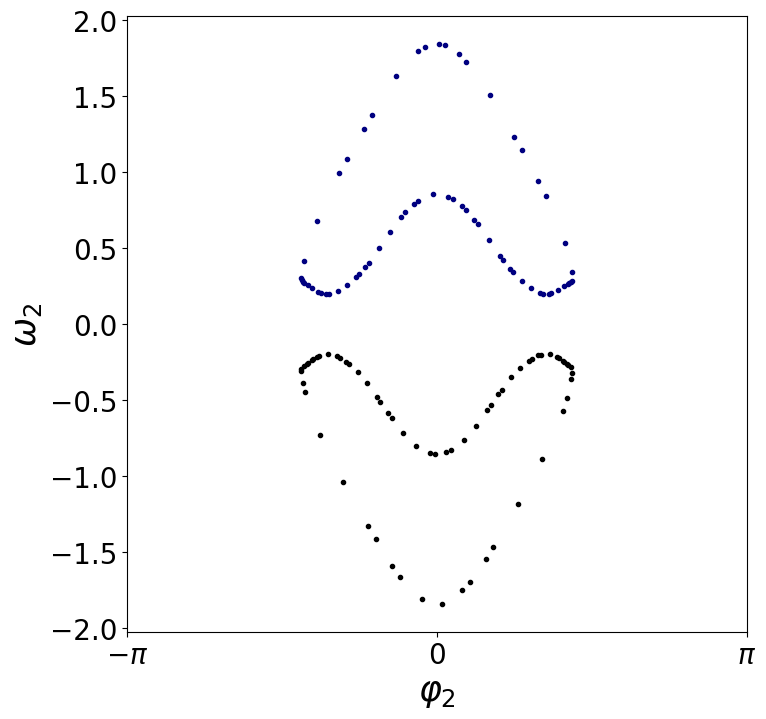

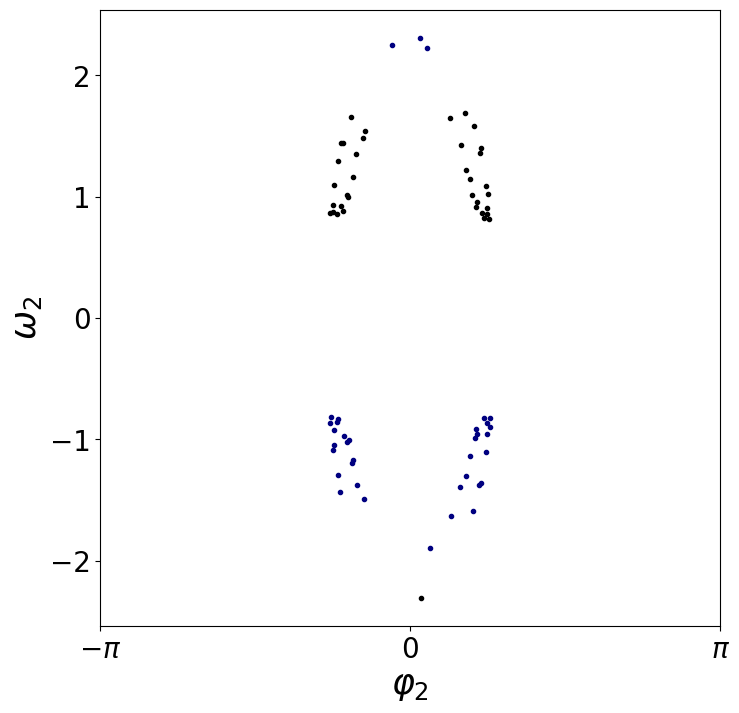

In [34]:
#double pendulum Poincaré
dp_params=[1,1,1,1] #parameters of the double pendulum: m1,m2,l1,l2
T,N,dt,t=time_samp(3000)
u0= [0,0,0,1] #inital parameters
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])
plt.yticks([-0.1,0,0.1],fontsize=20)
plt.yticks([-1.5,-1,-0.5,0,0.5,1,1.5],[-1.5,-1.0,-0.5,0,0.5,1.0,1.5],fontsize=20)
u0= [0,0,0,1.6] #inital parameters
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])
u0 = [0, 0, 0, 2]
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])


dp_params=[1,1,1,1] #parameters of the double pendulum: m1,m2,l1,l2
T,N,dt,t=time_samp(300)


u0 = [0.5, 0.02, -1, 0.02] #initial parameters
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])
plt.yticks([0,0.5,1,1.5,2],[0,0.5,1.0,1.5,2],fontsize=20)
u0 = [0.5, 0.5, 1, -1] #inital parameters
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])

dp_params=[1,1.88,1,1] #parameters of the double pendulum: m1,m2,l1,l2
u0 = [0, 0, 0, 2]
u1=odeint(double_pend,u0,t,args=(dp_params,),hmin=dt,hmax=dt)
poincare("",t,u1[:,1],u1[:,3],u1[:,0])


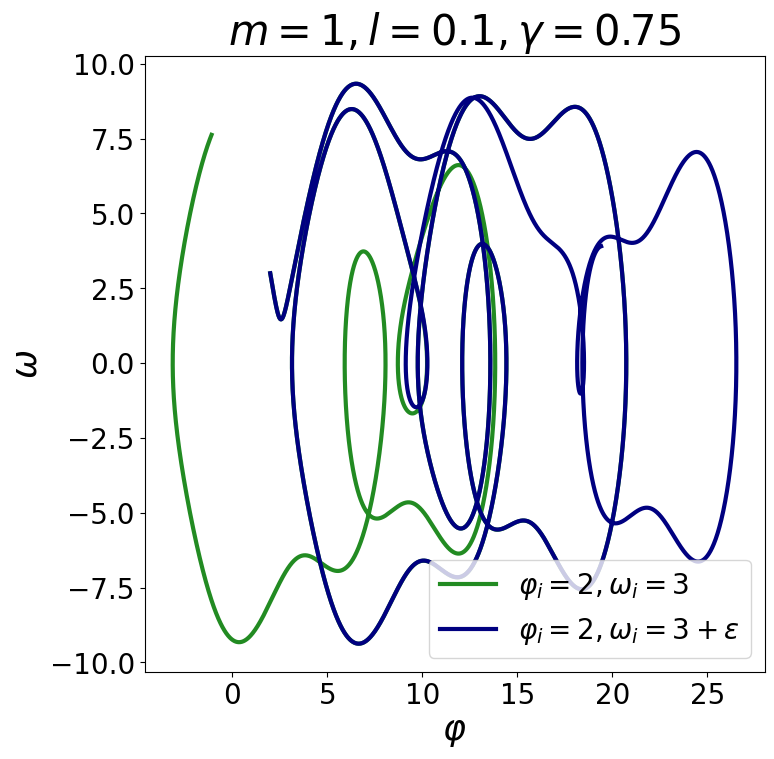

In [35]:
#Damped driven pendulum

dd_params=[1,0.1,0.75] #m,l,gamma
T,N,dt,t=time_samp(20)
u0=[2,3]
u1=odeint(dd_pend,u0,t,h0=dt,hmax=dt,args=(dd_params,sin_force,[1.2,2,0],lin_damp))
u0=[2,3+1e-4]
u2=odeint(dd_pend,u0,t,h0=dt,hmax=dt,args=(dd_params,sin_force,[1.2,2,0],lin_damp))

plt.figure(figsize=(8,8))
plt.plot(u1[:,0],u1[:,1],lw=3,color="forestgreen",markersize=2,label="$\\varphi_i=2,\\omega_i=3$")
plt.plot(u2[:,0],u2[:,1],lw=3,color="navy",markersize=2,label="$\\varphi_i=2,\\omega_i=3+\\epsilon$")

plt.title("$m=1,l=0.1,\\gamma=0.75$",fontsize=30)
plt.xlabel("$\\varphi$",size=25)
plt.ylabel("$\\omega$",size=25)
plt.xticks(size=20)
#plt.xticks([-np.pi,0,np.pi],["$-\\pi$","$0$","$\\pi$"],fontsize=20)
plt.yticks(size=20)
legend(fontsize=20)
plt.savefig("yaas.png",bbox_inches="tight")

Text(0.5, 1.0, '$\\omega_2^i=$1')

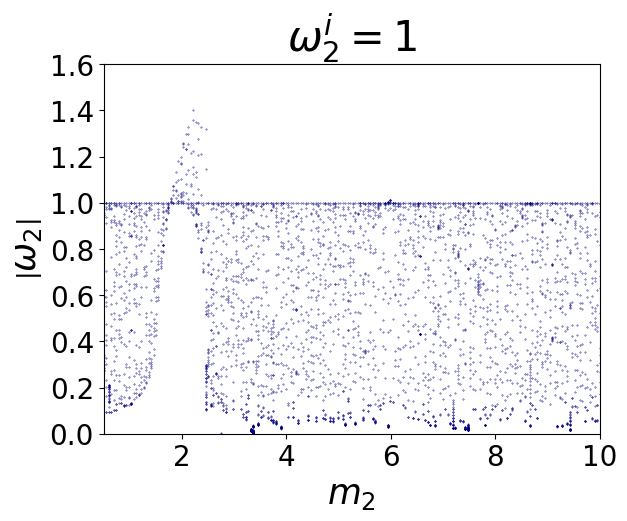

In [39]:
def dpbif_eva(u0,Np,runtime,ind,vali,valf,dp_params,xlabel,ylabel):
    T,N,dt,t=time_samp(runtime)
    #plt.figure(figsize=(15,8))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
    plt.xlim(vali,valf)
    for i in range(Np):
        val=vali+i*(valf-vali)/(Np-1)
        dp_params[ind]=val
        u1=odeint(double_pend,u0,t,args=(dp_params,))
        values=bif(t,u1[:,3],u1[:,1],1e-4)
        plt.plot([val for i in range(len(values))],abs(values),"o",markersize=0.3,color="navy")
        
        #double pendulum bifurcation
dp_params=[1,1,1,1] #parameters of the double pendulum: m1,m2,l1,l2

u0=[0,0,0,1] #inital parameters
dpbif_eva(u0,200,200,1,0.5,10,dp_params,"$m_2$","$\\left|\\omega_2\\right|$")
plt.ylim(0,1.6)
plt.title("$\\omega_2^i=$"+str(u0[-1]),fontsize=30)

Text(0.5, 1.0, '$\\omega_2^i=$1')

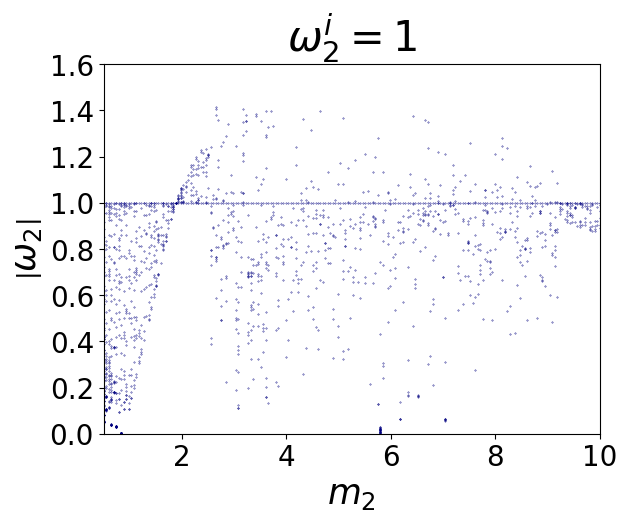

In [40]:
def dpbif_eva(u0,Np,runtime,ind,vali,valf,dp_params,xlabel,ylabel):
    T,N,dt,t=time_samp(runtime)
    #plt.figure(figsize=(15,8))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
    plt.xlim(vali,valf)
    for i in range(Np):
        val=vali+i*(valf-vali)/(Np-1)
        dp_params[ind]=val
        u1=odeint(double_pend,u0,t,args=(dp_params,))
        values=bif(t,u1[:,3],u1[:,1],1e-4)
        plt.plot([val for i in range(len(values))],abs(values),"o",markersize=0.3,color="navy")
        
        #double pendulum bifurcation
dp_params=[1,1,1,1] #parameters of the double pendulum: m1,m2,l1,l2

u0=[0,0,0,1] #inital parameters
dpbif_eva(u0,200,200,3,0.5,10,dp_params,"$l_2$","$\\left|\\omega_2\\right|$")
plt.ylim(0,1.6)
plt.title("$\\omega_2^i=$"+str(u0[-1]),fontsize=30)